# Naive Bayes 1 (From Scratch) - Breast Cancer Data

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

**Loading the Dataset and Analyzing It**

In [ ]:
df = pd.read_csv("breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

**Visualizing the Distribution of Diagnosis (Target Variable)**

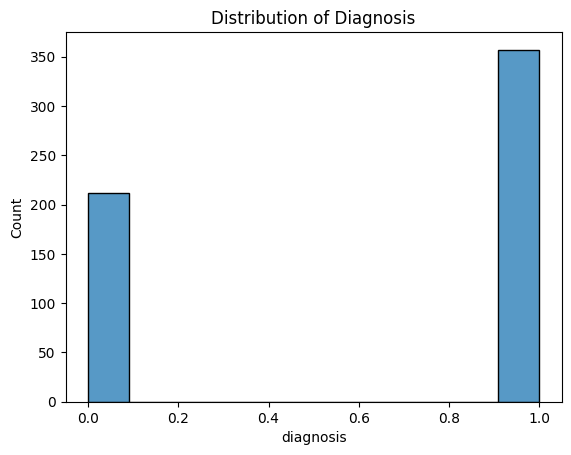

In [ ]:
sns.histplot(df["diagnosis"]).set(title="Distribution of Diagnosis")
plt.show()

**Heat Map to Find Correlated Features**

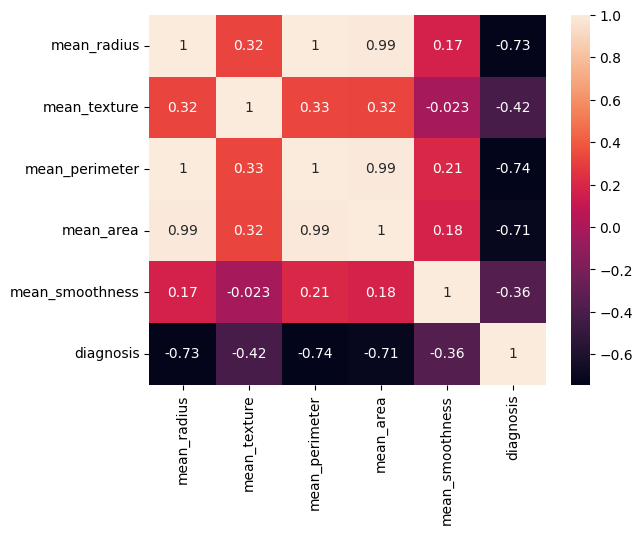

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.show()

The features mean_radius, mean_perimeter and mean_area are highly correlated. This makes sense as perimeter is 2pi(r) and area = pi(r)^2.
We will not consider mean_perimeter and mean_area while fitting the model.

**Visualizing the Distribution of the Feasible Features**

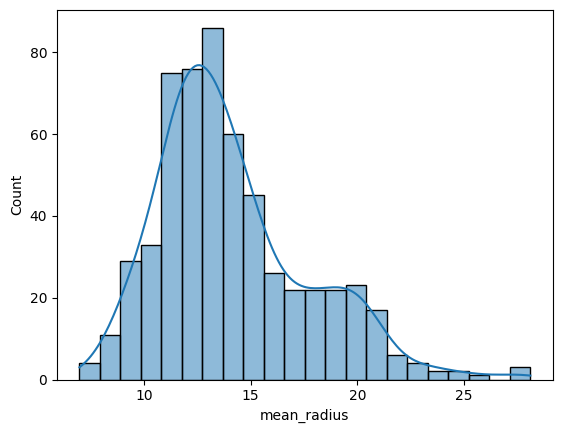

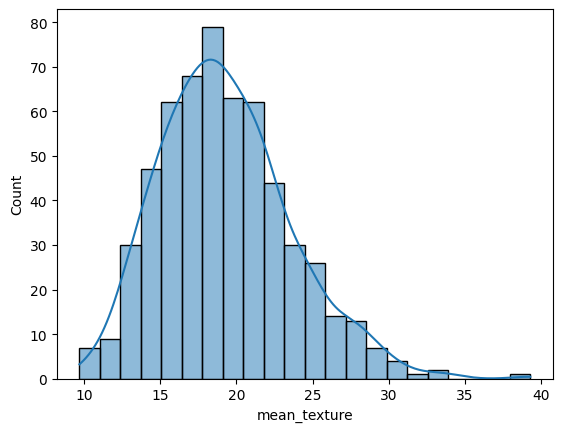

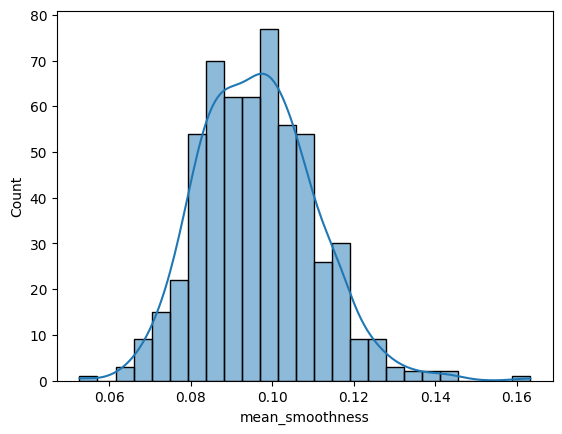

In [ ]:
features = ['mean_radius', 'mean_texture', 'mean_smoothness']
for feature in features:
  sns.histplot(df[feature], kde=True)
  plt.show()

The distribution of all 3 feasible features (mean_radius, mean_texture, mean_radius) approximates the normal distribution curve and thus applying Gaussian Naive Bayes is a viable solution.

**Calculating the Prior Probability**

In [ ]:
def calculate_prior(df, y):
  class_labels = list(df[y].unique())
  prior = []
  for label in class_labels:
    prior.append(len(df[df[y]==label])/len(df))
  return prior

In [ ]:
calculate_prior(df,"diagnosis")

[0.37258347978910367, 0.6274165202108963]

**Calculating Likelihood**

In [ ]:
def calculate_gaussian(df, feature, feature_val, y, class_label):
  features = list(df.columns)
  df = df[df[y]==class_label]
  mean, std = df[feature].mean(), df[feature].std()
  x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feature_val-mean)**2 / (2 * std**2 )))
  return x_given_y

**Function to Fit the Classifier and Predict**

In [ ]:
def naive_bayes_gaussian(df, X, y):
    features = list(df.columns)[:-1]
    prior = calculate_prior(df, y)
    y_pred = []

    for x in X:
        labels = sorted(list(df[y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_gaussian(df, features[i], x[i], y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        y_pred.append(np.argmax(post_prob))

    return np.array(y_pred)

**Splitting the Data into Train & Test**

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

**Making Predictions for Testing Data**

In [ ]:
y_pred = naive_bayes_gaussian(train, X=X_test, y="diagnosis")

**Evaluating Model Performance**

In [ ]:
print("Confusion Matrix: \n ", confusion_matrix(y_test, y_pred))
print(" \n F1 Score: ", f1_score(y_test, y_pred) )
print(" \n Classification Report: \n ", classification_report(y_test, y_pred))

Confusion Matrix: 
  [[37  6]
 [ 3 68]]
 
 F1 Score:  0.9379310344827587
 
 Classification Report: 
                precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.92      0.96      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



The F1 Score, Recall and Accuracy of the Classifier is pretty good.

# Naive Bayes 2 - Social Networks Ads Dataset

**Loading and Analyzing the Dataset**

In [ ]:
data = pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.drop("User ID", axis=1, inplace=True)
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


**Visualizing the Distribution of Purchased (Target Variable)**

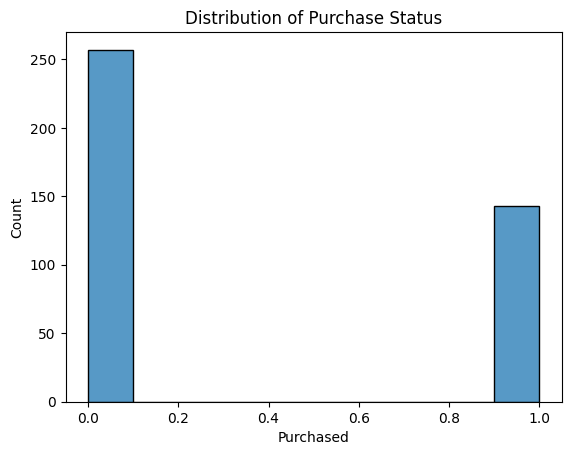

In [ ]:
sns.histplot(data["Purchased"]).set(title="Distribution of Purchase Status")
plt.show()

**Heat Map to Find Highly Correlated Features**

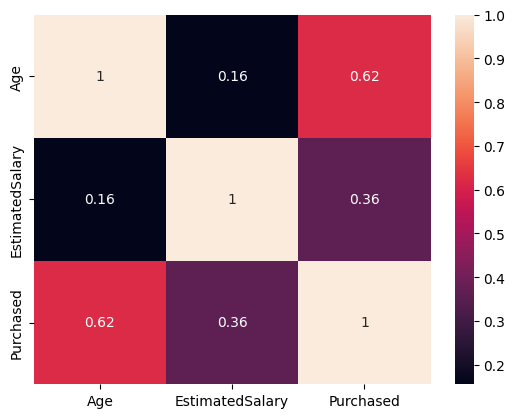

In [ ]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2g')
plt.show()

**Encoding Categorical Features**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender']= label_encoder.fit_transform(data['Gender'])
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

**Splitting the Data into Train & Test**

In [ ]:
X1 = data.iloc[:, :-1]
y1 = data.iloc[:, -1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

**Fitting the Model and Predicting Values for Testing Data**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X1_train, y1_train)

GaussianNB()

In [ ]:
y1_pred = clf.predict(X1_test)

**Evaluating Model Performance**

In [ ]:
print("Confusion Matrix: \n ", confusion_matrix(y1_test, y1_pred))
print(" \n F1 Score: ", f1_score(y1_test, y1_pred))
print("\n Classification Report: \n", classification_report(y1_test, y1_pred))

Confusion Matrix: 
  [[50  2]
 [ 3 25]]
 
 F1 Score:  0.9090909090909091

 Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



The F1 score, Recall and Accuracy of the Classifier is pretty good.

# Naive Bayes 3 - German Credit Risk Dataset

**Loading and Analyzing the Dataset**

In [ ]:
data2 = pd.read_csv("german_credit_data.csv")
data2

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
data2.dropna(inplace=True)
data2.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
data2.reset_index(drop=True, inplace=True)

**Visualizing the Distribution of Risk Status (Target Variable)**

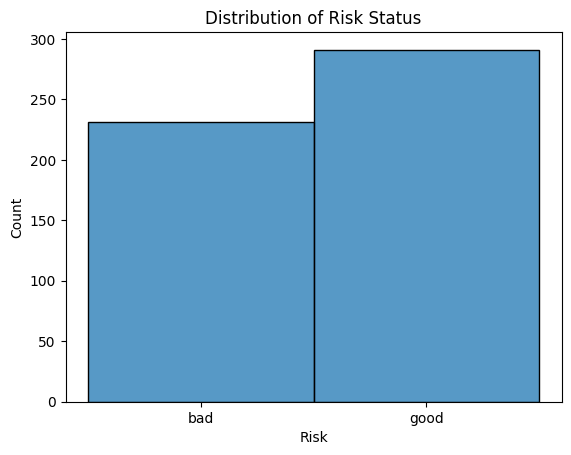

In [ ]:
sns.histplot(data2["Risk"]).set(title="Distribution of Risk Status")
plt.show()

**Heat Map to Find Highly Correlated Features**

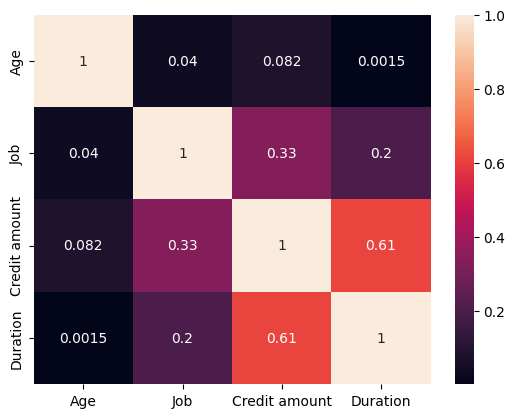

In [ ]:
sns.heatmap(data2.corr(numeric_only=True), annot=True, fmt='.2g')
plt.show()

**Checking if the non-numeric features are categorical**

In [ ]:
cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose','Risk']
for col in cols:
  print(data2[col].value_counts())

male      354
female    168
Name: Sex, dtype: int64
2    313
1    116
3     79
0     14
Name: Job, dtype: int64
own     349
rent    108
free     65
Name: Housing, dtype: int64
little        412
moderate       64
quite rich     23
rich           23
Name: Saving accounts, dtype: int64
little      245
moderate    224
rich         53
Name: Checking account, dtype: int64
car                    173
radio/TV               132
furniture/equipment    107
business                53
education               28
repairs                 14
vacation/others          9
domestic appliances      6
Name: Purpose, dtype: int64
good    291
bad     231
Name: Risk, dtype: int64


**Encoding Categorical Features**

In [ ]:
for col in cols:
  data2[col]= label_encoder.fit_transform(data2[col])

data2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,0,2,1,0,1,5951,48,5,0
1,45,1,2,0,0,0,7882,42,4,1
2,53,1,2,0,0,0,4870,24,1,0
3,35,1,3,2,0,1,6948,36,1,1
4,28,1,3,1,0,1,5234,30,1,0
...,...,...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24,5,1
518,30,1,3,1,0,0,3959,36,4,1
519,40,1,3,1,0,0,3857,30,1,1
520,23,1,2,0,0,0,1845,45,5,0


**Splitting the Data into Train & Test**

In [ ]:
X2 = data2.iloc[:, :-1]
y2 = data2.iloc[:, -1]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=21)

**Fitting the Model & Predicting Values for Testing Data**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(X2_train, y2_train)

GaussianNB()

In [ ]:
y2_pred = clf2.predict(X2_test)

**Evaluating Model Performance**

In [ ]:
print("Confusion Matrix: \n ", confusion_matrix(y2_test, y2_pred))
print(" \n F1 Score: ", f1_score(y2_test, y2_pred))
print("\n Classification Report: \n", classification_report(y2_test, y2_pred))

Confusion Matrix: 
  [[14 32]
 [11 48]]
 
 F1 Score:  0.6906474820143884

 Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.30      0.39        46
           1       0.60      0.81      0.69        59

    accuracy                           0.59       105
   macro avg       0.58      0.56      0.54       105
weighted avg       0.58      0.59      0.56       105



The model is performing poorly on all metrics. It is apparent from the confusion matrix that the number of false positives is pretty high. The accuracy is also low but f1 score is a better metric for classifiers anyway - which is also not great.

In [ ]:
y_train_pred = clf2.predict(X2_train)
print("Training Score: ", f1_score(y2_train, y_train_pred))

Training Score:  0.713450292397661


The training score is close to the testing score. So we can conclude that the model is not overfitting. It might be underfitting.  